# Optimal tau as a function of the image and noise level

In [1]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

#from ipywidgets import *
try:
    import cv2
except:
    !pip install cv2
    import cv2
    
#import kernels
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils

In [2]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

In [4]:
try:
    import denoising.image.gaussian as denoising
except:
    !pip install "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
    import denoising.image.gaussian as denoising

In [5]:
denoiser = denoising.Monochrome_Denoising(logger)

### Confocal_FISH

In [6]:
Args = namedtuple("args", ["clean"])
args = Args("http://www.hpca.ual.es/~vruiz/images/FDM/Confocal_FISH.png")

In [7]:
X = skimage_io.imread(args.clean)

### Confocal_FISH_GF_optimal_tau

In [8]:
taus = [(0.2 + i/40) for i in range(120)] # Number of points per line
std_devs = [i for i in range(0, 200, 40)]
PCC_curves = []
poisson_ratio = 0.5
gamma = 0.15
for std_dev in std_devs: # Number of noise levels
    PCC_curve = []
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio).reshape(X.shape)
    for tau in taus: # Filter length
        sigma = np.array([tau, tau])
        kernel = [None]*2
        kernel[0] = utils.get_gaussian_kernel(sigma[0])
        kernel[1] = utils.get_gaussian_kernel(sigma[1])
        #print("Kernel:", kernel)
        denoised = denoiser.filter(Y, kernel)
        PCC = np.corrcoef(denoised.flatten(), X.flatten())[0, 1]
        print("std_dev:", std_dev, "tau:", tau, "PCC:", PCC)
        PCC_curve.append(PCC)

    PCC_curves.append(PCC_curve)
    print()

std_dev: 0 tau: 0.2 PCC: 0.9691115570813651
std_dev: 0 tau: 0.225 PCC: 0.9691221905055685
std_dev: 0 tau: 0.25 PCC: 0.9691854782446602
std_dev: 0 tau: 0.275 PCC: 0.9694086224872722
std_dev: 0 tau: 0.30000000000000004 PCC: 0.9699547319105173
std_dev: 0 tau: 0.325 PCC: 0.9709769147472168
std_dev: 0 tau: 0.35 PCC: 0.972532248101945
std_dev: 0 tau: 0.375 PCC: 0.9745382711935758
std_dev: 0 tau: 0.4 PCC: 0.9767912650406297
std_dev: 0 tau: 0.42500000000000004 PCC: 0.9790530255472069
std_dev: 0 tau: 0.45 PCC: 0.9811207161393329
std_dev: 0 tau: 0.47500000000000003 PCC: 0.9828689136740628
std_dev: 0 tau: 0.5 PCC: 0.9842510137074449
std_dev: 0 tau: 0.525 PCC: 0.9852779903315477
std_dev: 0 tau: 0.55 PCC: 0.9859924882551524
std_dev: 0 tau: 0.575 PCC: 0.9864483767022597
std_dev: 0 tau: 0.6000000000000001 PCC: 0.9866982949943799
std_dev: 0 tau: 0.625 PCC: 0.9867818110882557
std_dev: 0 tau: 0.65 PCC: 0.9867464379065143
std_dev: 0 tau: 0.675 PCC: 0.9866153314662262
std_dev: 0 tau: 0.7 PCC: 0.9864096308

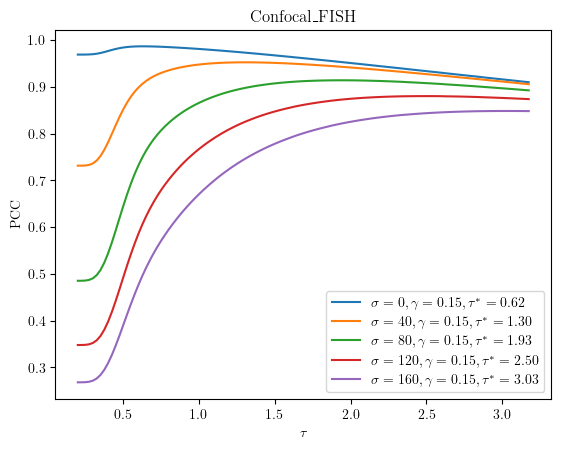

In [9]:
#plt.title(r"$\mathbf{X}=\mathrm{Barb}$")
#plt.title(r"$\mathbb{E}_{\text{" + str(iters) + r"}}(\mathbf{N}" + rf"/{_lambda}" + r"), \mathbf{N}\sim\mathrm{Poisson}" + rf"(\lambda={_lambda}" + r"\mathrm{Barb})$")
#plt.title("Averaging Poisson noisy instances of \"Barb\"")
#for i in range(len(curves)):
optimal_taus = []
i = 0
for std_dev in std_devs:
    #plt.plot([i/10 for i in range(5, 20, 1)], curves[i], label=rf"$\sigma={10+i*5}, \lambda={(10-i)/40}\cdot" + r"\mathrm{Barb}$")
    #if ((10+i*5) == 40) and ((10-i)/40 == 0.15):
    #plt.plot(sigmas_kernel, curves[i], label=rf"$\sigma={10+i*5}, \gamma={(10-i)/40}" + r", \mathrm{argmax}_\tau=" + rf"{sigmas_kernel[np.argmax(curves[i])]:.2f}$", marker='o')
    #else:
    optimal_tau = taus[np.argmax(PCC_curves[i])]
    optimal_taus.append(optimal_tau)
    plt.plot(taus,
        PCC_curves[i],
        label=rf"$\sigma={std_dev}, \gamma={gamma}"
        + r", \tau^*="
        + rf"{optimal_tau:.2f}"
        + "$")
    i += 1
plt.title(r"$\mathrm{Confocal\_FISH}$")
plt.ylabel(r"$\text{PCC}$")
#plt.ylabel(r"$\mathrm{PCC}(\mathbf{X}, \hat{\mathbf{X}})$")
plt.xlabel(r"$\tau$")
plt.legend()
#plt.show()
### barb_GF_optimal_tau
#plt.title(r"$\mathbf{X}=\text{Barb}$")
plt.savefig("Confocal_FISH_GF_optimal_tau.pdf", bbox_inches='tight')

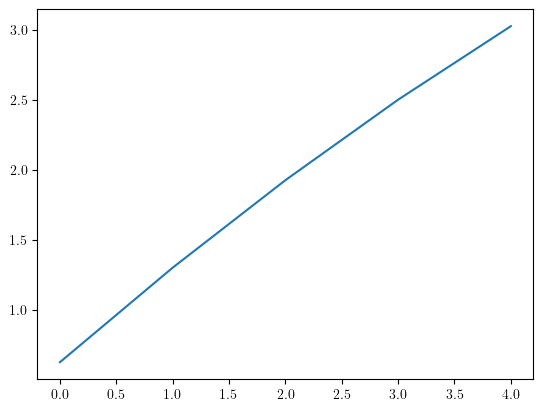

In [10]:
plt.plot(optimal_taus)

In [ ]:
optimal_taus = np.array(optimal_taus)
np.save("Confocal_FISH_GF_optimal_taus.npy", optimal_taus)